In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score, plot_confusion_matrix, plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc

In [2]:
df = pd.read_csv('Ad click data.csv')
df

,VistID,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,Country_Name,City_code,Male,Time_Period,Weekday,Month,Year,Clicked
0,5183153,87.97,43,55901.12,185.46,product_11,Serbia,City_5,No,Mid-Night,Thursday,July,2020,0
1,4023265,51.63,50,39132.00,176.73,product_8,Turkmenistan,City_1,No,Evening,Saturday,June,2020,1
2,4708083,82.37,38,57032.36,210.60,product_6,Northern Mariana Islands,City_2,No,Morning,Tuesday,January,2020,0
3,9771815,62.06,45,48868.00,190.05,product_19,South Africa,City_3,Yes,Morning,Thursday,April,2020,1
4,6451317,77.66,31,61608.23,204.86,product_11,Guadeloupe,City_2,No,Noon,Thursday,January,2020,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6652,1215532,69.08,23,57756.89,195.68,product_29,Jersey,City_4,Yes,Night,Thursday,April,2020,0
6653,1199837,72.23,23,52968.22,247.90,product_25,Madagascar,City_5,Yes,Noon,Sunday,July,2020,0
6654,8523595,57.20,56,24079.00,129.23,product_24,Algeria,City_2,No,Morning,Thursday,April,2020,1
6655,2584490,88.04,28,64188.50,241.03,product_18,Bosnia and Herzegovina,City_7,Yes,Mid-Night,Friday,January,2020,0


In [3]:
df.head()

,VistID,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,Country_Name,City_code,Male,Time_Period,Weekday,Month,Year,Clicked
0,5183153,87.97,43,55901.12,185.46,product_11,Serbia,City_5,No,Mid-Night,Thursday,July,2020,0
1,4023265,51.63,50,39132.00,176.73,product_8,Turkmenistan,City_1,No,Evening,Saturday,June,2020,1
2,4708083,82.37,38,57032.36,210.60,product_6,Northern Mariana Islands,City_2,No,Morning,Tuesday,January,2020,0
3,9771815,62.06,45,48868.00,190.05,product_19,South Africa,City_3,Yes,Morning,Thursday,April,2020,1
4,6451317,77.66,31,61608.23,204.86,product_11,Guadeloupe,City_2,No,Noon,Thursday,January,2020,0


In [4]:
df.tail()

,VistID,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,Country_Name,City_code,Male,Time_Period,Weekday,Month,Year,Clicked
6652,1215532,69.08,23,57756.89,195.68,product_29,Jersey,City_4,Yes,Night,Thursday,April,2020,0
6653,1199837,72.23,23,52968.22,247.90,product_25,Madagascar,City_5,Yes,Noon,Sunday,July,2020,0
6654,8523595,57.20,56,24079.00,129.23,product_24,Algeria,City_2,No,Morning,Thursday,April,2020,1
6655,2584490,88.04,28,64188.50,241.03,product_18,Bosnia and Herzegovina,City_7,Yes,Mid-Night,Friday,January,2020,0
6656,4315798,68.01,20,59761.56,214.53,product_22,Serbia,City_5,No,Night,Wednesday,July,2020,1


In [5]:
df.shape

(6657, 14)

In [6]:
df.isnull().sum()

VistID            0
Time_Spent        0
Age               0
Avg_Income        0
Internet_Usage    0
Ad_Topic          0
Country_Name      0
City_code         0
Male              0
Time_Period       0
Weekday           0
Month             0
Year              0
Clicked           0
dtype: int64

In [7]:
df.dtypes

VistID              int64
Time_Spent        float64
Age                 int64
Avg_Income        float64
Internet_Usage    float64
Ad_Topic           object
Country_Name       object
City_code          object
Male               object
Time_Period        object
Weekday            object
Month              object
Year                int64
Clicked             int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6657 entries, 0 to 6656
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   VistID          6657 non-null   int64  
 1   Time_Spent      6657 non-null   float64
 2   Age             6657 non-null   int64  
 3   Avg_Income      6657 non-null   float64
 4   Internet_Usage  6657 non-null   float64
 5   Ad_Topic        6657 non-null   object 
 6   Country_Name    6657 non-null   object 
 7   City_code       6657 non-null   object 
 8   Male            6657 non-null   object 
 9   Time_Period     6657 non-null   object 
 10  Weekday         6657 non-null   object 
 11  Month           6657 non-null   object 
 12  Year            6657 non-null   int64  
 13  Clicked         6657 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 728.2+ KB


In [9]:
df['Time_Spent'].mean()

66.84954784437448

In [10]:
df['Internet_Usage'].mean()

184.94768364128032

In [11]:
df.skew()

VistID            0.000168
Time_Spent       -0.539031
Age               0.200971
Avg_Income       -0.719748
Internet_Usage   -0.208078
Year              0.000000
Clicked           0.175261
dtype: float64

In [12]:
df.kurt()

VistID           -1.198449
Time_Spent       -0.886831
Age              -0.961424
Avg_Income        0.066426
Internet_Usage   -1.198460
Year              0.000000
Clicked          -1.969875
dtype: float64

In [13]:
df.describe()

,VistID,Time_Spent,Age,Avg_Income,Internet_Usage,Year,Clicked
count,6.657000e+03,6657.000000,6657.000000,6657.000000,6657.000000,6657.0,6657.000000
mean,5.542115e+06,66.849548,37.258825,55930.486743,184.947684,2020.0,0.456362
std,2.596284e+06,15.509672,10.995458,13110.339257,43.189896,0.0,0.498129
min,1.000187e+06,32.600000,19.000000,13996.500000,104.780000,2020.0,0.000000
25%,3.307428e+06,55.200000,28.000000,48454.000000,145.730000,2020.0,0.000000
50%,5.523907e+06,70.660000,36.000000,58183.000000,193.580000,2020.0,0.000000
75%,7.823942e+06,79.570000,46.000000,65957.000000,222.260000,2020.0,1.000000
max,9.999708e+06,91.430000,61.000000,79484.800000,269.960000,2020.0,1.000000


In [14]:
df=df.drop(['VistID'],axis=1)
df=df.drop(['Year'],axis=1)
df=df.drop(['Country_Name'],axis=1)

In [15]:
df.head()

,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,City_code,Male,Time_Period,Weekday,Month,Clicked
0,87.97,43,55901.12,185.46,product_11,City_5,No,Mid-Night,Thursday,July,0
1,51.63,50,39132.00,176.73,product_8,City_1,No,Evening,Saturday,June,1
2,82.37,38,57032.36,210.60,product_6,City_2,No,Morning,Tuesday,January,0
3,62.06,45,48868.00,190.05,product_19,City_3,Yes,Morning,Thursday,April,1
4,77.66,31,61608.23,204.86,product_11,City_2,No,Noon,Thursday,January,0


In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()

In [18]:
df['Ad_Topic']=le.fit_transform(df['Ad_Topic'])
df['City_code']=le.fit_transform(df['City_code'])
df['Male']=le.fit_transform(df['Male'])
df['Time_Period']=le.fit_transform(df['Time_Period'])
df['Weekday']=le.fit_transform(df['Weekday'])
df['Month']=le.fit_transform(df['Month'])

In [19]:
df.head()

,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,City_code,Male,Time_Period,Weekday,Month,Clicked
0,87.97,43,55901.12,185.46,2,4,0,2,4,3,0
1,51.63,50,39132.00,176.73,28,0,0,1,2,4,1
2,82.37,38,57032.36,210.60,26,1,0,3,5,2,0
3,62.06,45,48868.00,190.05,10,2,1,3,4,0,1
4,77.66,31,61608.23,204.86,2,1,0,5,4,2,0


<AxesSubplot:xlabel='Clicked'>

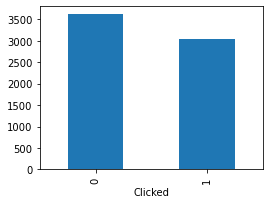

In [20]:
GroupedData=df.groupby('Clicked').size()
GroupedData.plot(kind='bar', figsize=(4,3))

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Avg_Income'>

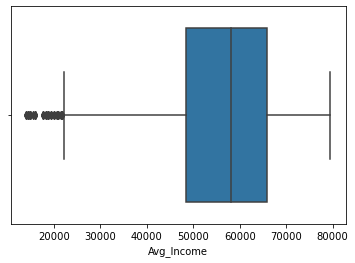

In [21]:
sns.boxplot(df['Avg_Income'])

<AxesSubplot:xlabel='Internet_Usage', ylabel='Count'>

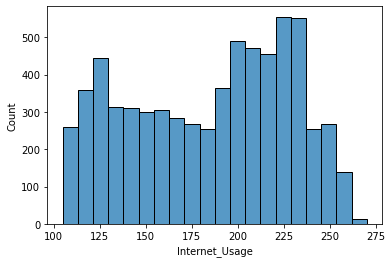

In [22]:
sns.histplot(df['Internet_Usage'],bins=20)

In [23]:
dfcorr = df.corr()
dfcorr

,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,City_code,Male,Time_Period,Weekday,Month,Clicked
Time_Spent,1.000000,-0.185667,0.364737,0.588360,-0.008897,0.180271,0.017420,0.109997,-0.001762,-0.002375,-0.712439
Age,-0.185667,1.000000,-0.104503,-0.199750,-0.012536,-0.057753,-0.017007,-0.042219,-0.003079,-0.005713,0.244121
Avg_Income,0.364737,-0.104503,1.000000,0.383978,0.006981,0.117894,0.007760,0.052142,0.000612,-0.003636,-0.460287
Internet_Usage,0.588360,-0.199750,0.383978,1.000000,-0.014685,0.198759,0.019261,0.088604,0.002348,-0.016393,-0.742764
Ad_Topic,-0.008897,-0.012536,0.006981,-0.014685,1.000000,0.000231,-0.006088,0.004716,-0.007806,0.002170,0.019826
City_code,0.180271,-0.057753,0.117894,0.198759,0.000231,1.000000,0.021354,0.031228,-0.015371,-0.004908,-0.236859
Male,0.017420,-0.017007,0.007760,0.019261,-0.006088,0.021354,1.000000,0.021742,0.017184,0.025123,-0.027416
Time_Period,0.109997,-0.042219,0.052142,0.088604,0.004716,0.031228,0.021742,1.000000,0.003271,0.032581,-0.118248
Weekday,-0.001762,-0.003079,0.000612,0.002348,-0.007806,-0.015371,0.017184,0.003271,1.000000,-0.005379,0.004672
Month,-0.002375,-0.005713,-0.003636,-0.016393,0.002170,-0.004908,0.025123,0.032581,-0.005379,1.000000,0.004226


<AxesSubplot:>

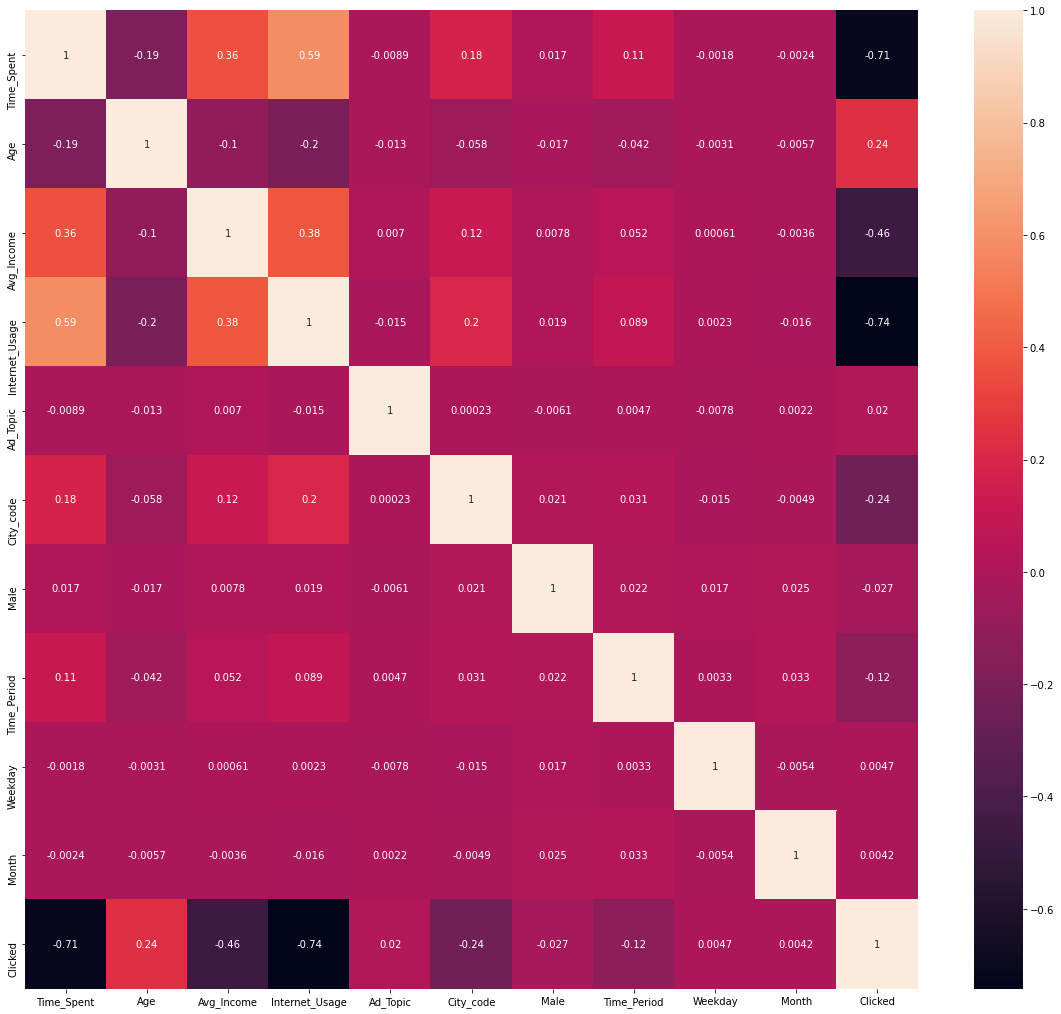

In [24]:
plt.figure(figsize=(20,18))
sns.heatmap(dfcorr,annot=True)

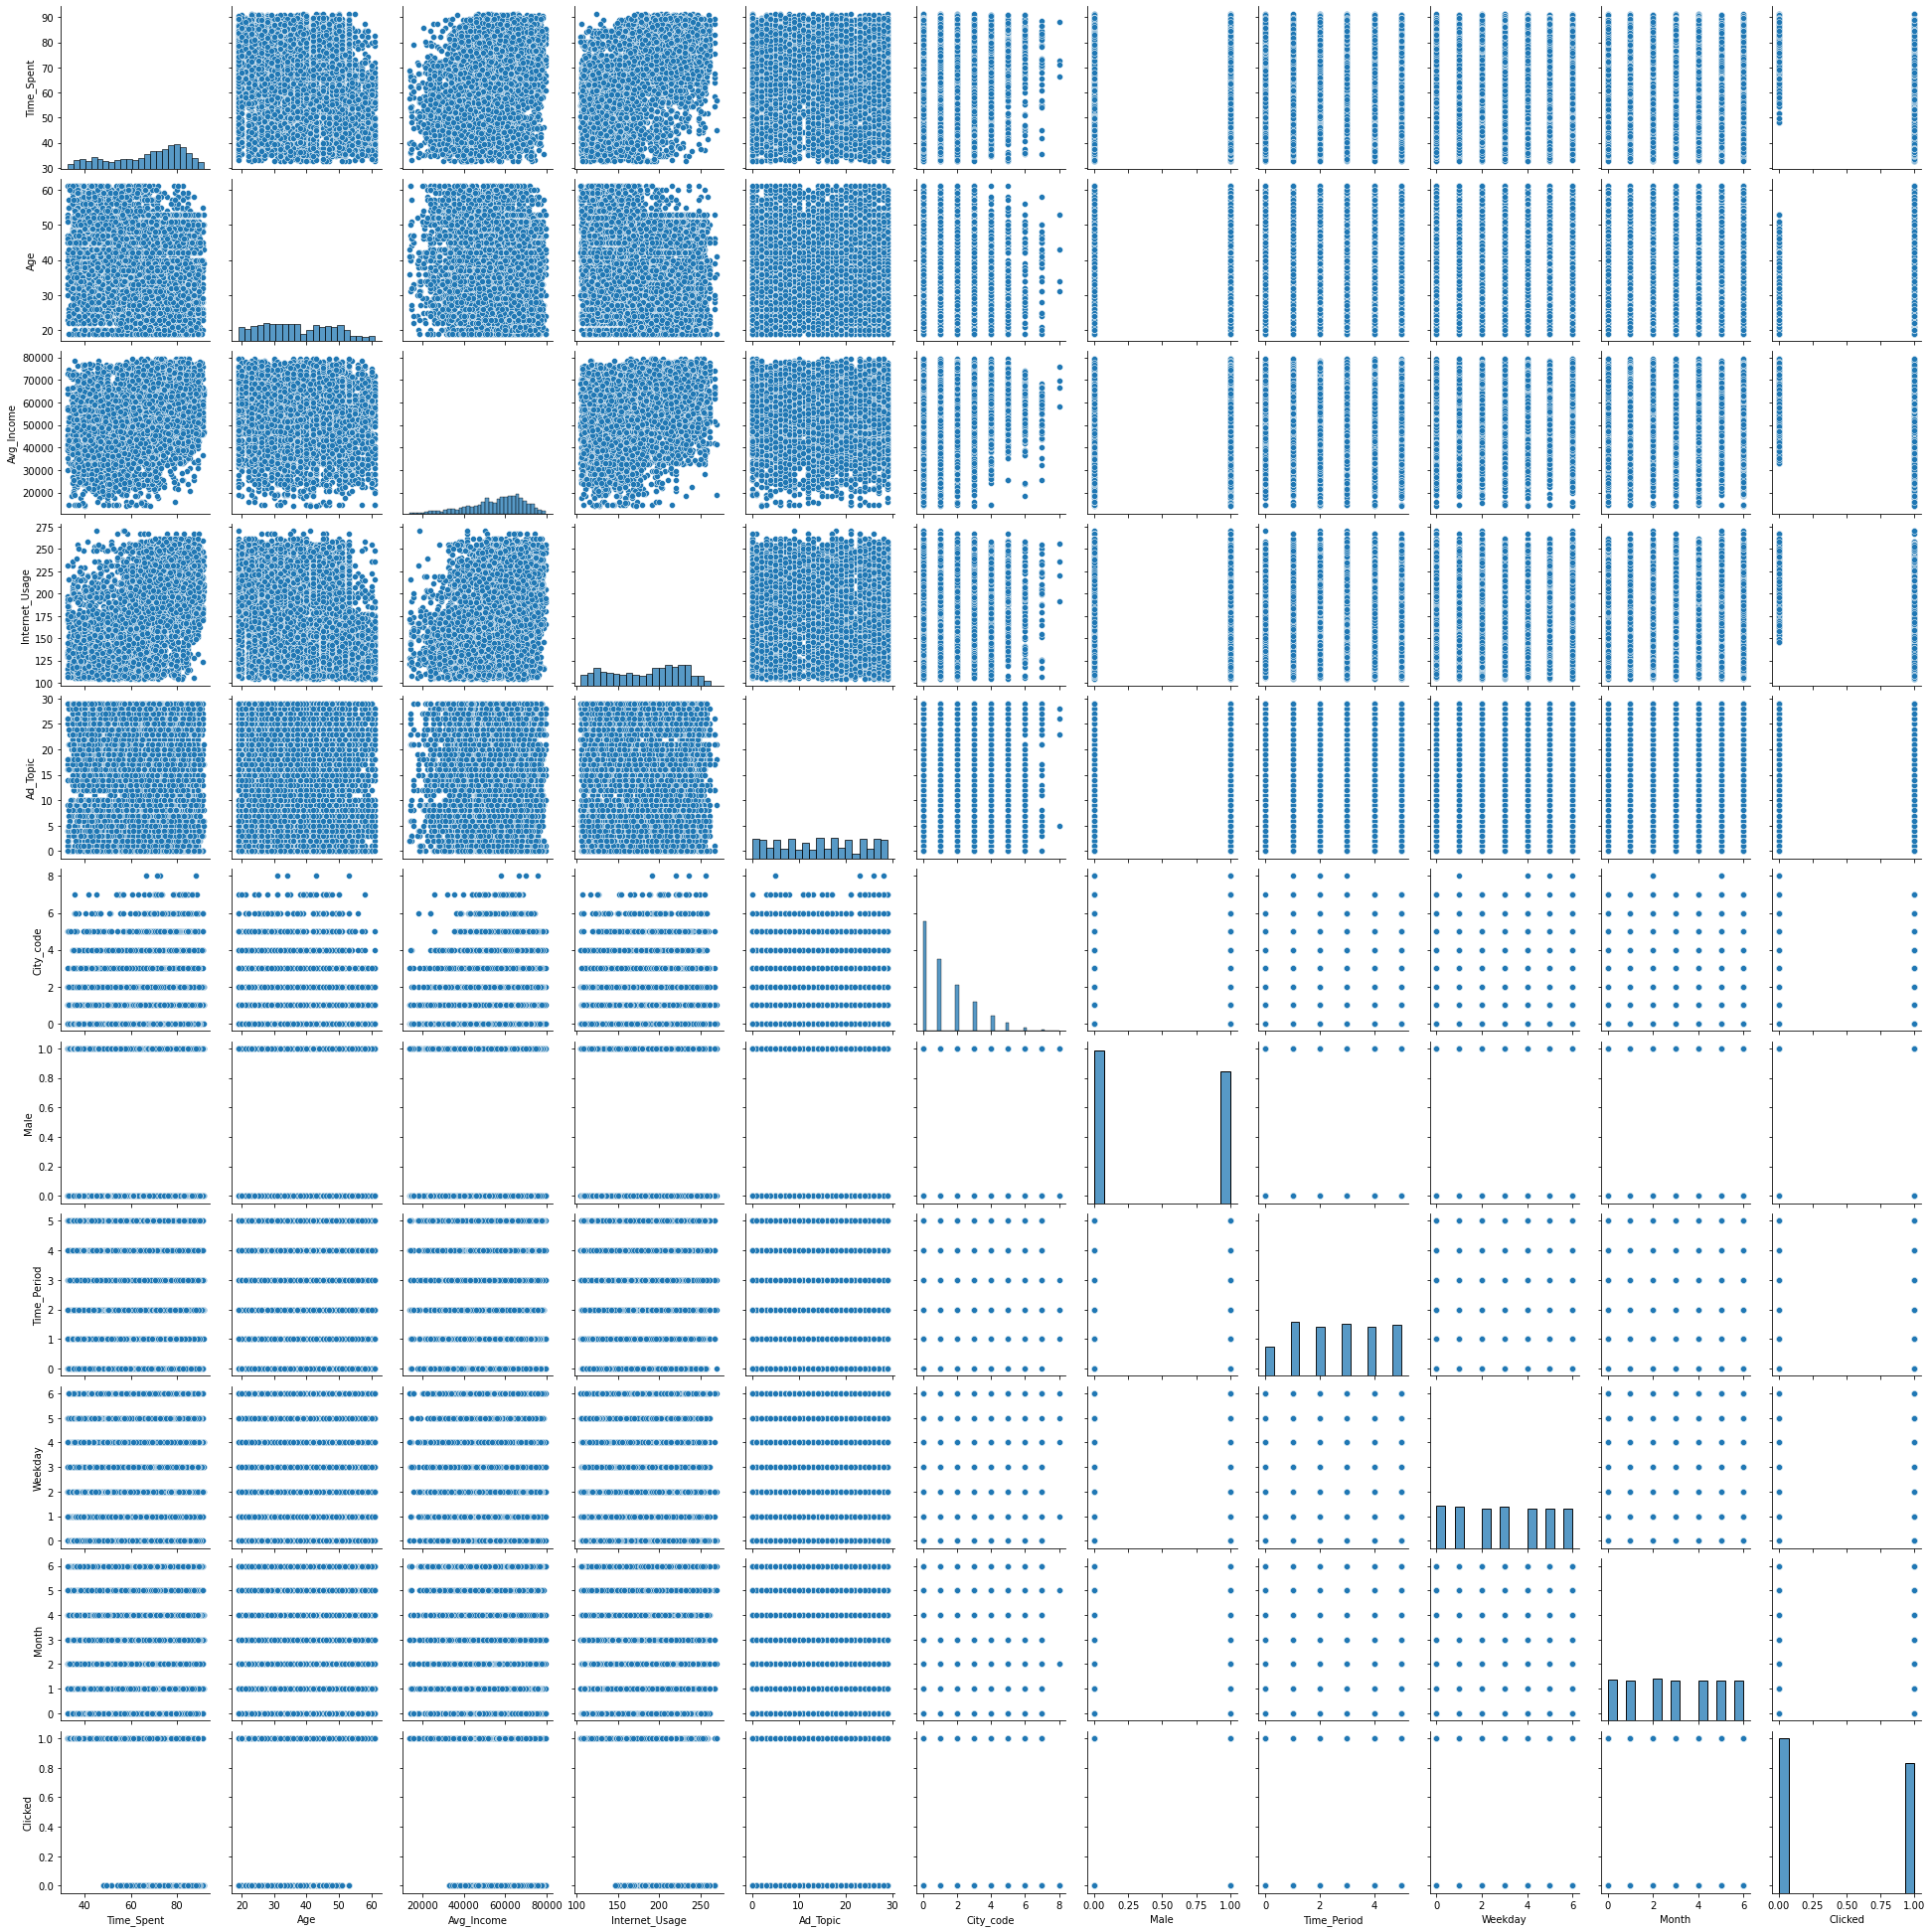

In [25]:
sns.pairplot(df)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Internet_Usage', ylabel='Density'>

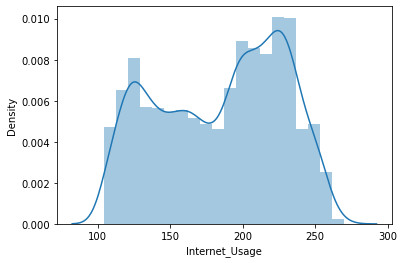

In [26]:
sns.distplot(df['Internet_Usage'],bins=20)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Time_Spent', ylabel='Density'>

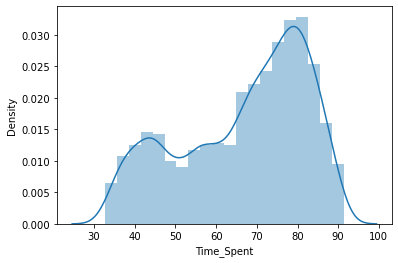

In [27]:
sns.distplot(df['Time_Spent'],bins=20)

In [29]:
X=df.drop(['Clicked'], axis=1)
y=df['Clicked']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 42)

In [31]:
rf = RandomForestClassifier()

In [32]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [33]:
y_pred = rf.predict(X_test)

In [34]:
y_pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [35]:
accuracy_score(y_test,y_pred)

0.9424424424424425

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1080
           1       0.97      0.90      0.94       918

    accuracy                           0.94      1998
   macro avg       0.95      0.94      0.94      1998
weighted avg       0.94      0.94      0.94      1998



In [37]:
cm=confusion_matrix(y_test,y_pred)

In [38]:
print(cm)

[[1055   25]
 [  90  828]]


In [39]:
Accuracy_Values=cross_val_score(rf, X , y, cv=10, scoring='f1_weighted')

In [40]:
Accuracy_Values

array([0.94289309, 0.90594235, 0.93969814, 0.94265746, 0.94719772,
       0.96080379, 0.94869352, 0.9472557 , 0.95926053, 0.95476661])

In [41]:
np.mean(Accuracy_Values)

0.9449168907604765

In [42]:
np.std(Accuracy_Values)

0.014613477261798518

In [43]:
ln = LogisticRegression()

In [44]:
ln.fit(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
y_pred = ln.predict(X_test)

In [46]:
accuracy_score(y_test,y_pred)

0.8118118118118118

Text(0, 0.5, 'True Positive Rate')

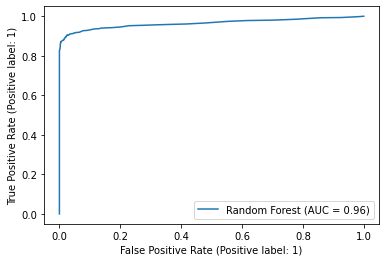

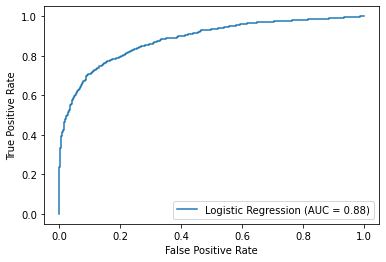

In [47]:
plot_roc_curve(rf,X_test, y_test,  name= 'Random Forest')
plot_roc_curve(ln,X_test, y_test,  name= 'Logistic Regression')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [48]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rf.predict(X_test))

In [49]:
print (auc(false_positive_rate, true_positive_rate))

0.9394063180827886


In [50]:
print(roc_auc_score(y_test, y_pred))

0.8050108932461874


In [51]:
gb = GradientBoostingClassifier()

In [52]:
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [53]:
y_pred = gb.predict(X_test)

In [54]:
accuracy_score(y_test,y_pred)

0.9424424424424425

Text(0, 0.5, 'True Positive Rate')

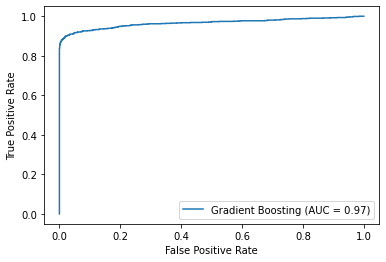

In [55]:
plot_roc_curve(gb,X_test, y_test,  name= 'Gradient Boosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [56]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, gb.predict(X_test))

In [57]:
print (auc(false_positive_rate, true_positive_rate))

0.9390795206971678


In [58]:
print(roc_auc_score(y_test, y_pred))

0.9390795206971678


In [59]:
dt = DecisionTreeClassifier()

In [60]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [61]:
y_pred = dt.predict(X_test)

In [62]:
accuracy_score(y_test,y_pred)

0.8813813813813813

In [63]:
ad=AdaBoostClassifier()

In [64]:
ad.fit(X_train,y_train)

AdaBoostClassifier()

In [65]:
y_pred = ad.predict(X_test)

In [66]:
accuracy_score(y_test,y_pred)

0.9374374374374375

In [67]:
gaus=GaussianNB()

In [68]:
gaus.fit(X_train,y_train)

GaussianNB()

In [69]:
y_pred = gaus.predict(X_test)

In [70]:
accuracy_score(y_test,y_pred)

0.9384384384384384

In [71]:
ET=ExtraTreesClassifier()

In [72]:
ET.fit(X_train,y_train)

ExtraTreesClassifier()

In [73]:
y_pred = ET.predict(X_test)

In [74]:
accuracy_score(y_test,y_pred)

0.9404404404404404

In [75]:
model=SVC()

In [76]:
model.fit(X_train,y_train)

SVC()

In [77]:
y_pred = model.predict(X_test)

In [78]:
accuracy_score(y_test,y_pred)

0.7202202202202203

In [79]:
cm=confusion_matrix(y_test,ET.predict(X_test))

In [80]:
print(cm)

[[1057   23]
 [  96  822]]


In [82]:
Accuracy_Values=cross_val_score(ET, X , y, cv=10, scoring='f1_weighted')

In [83]:
Accuracy_Values

array([0.94430563, 0.8983224 , 0.93214438, 0.94415224, 0.94259731,
       0.95624954, 0.94113344, 0.94120433, 0.95165951, 0.94569727])

In [84]:
np.mean(Accuracy_Values)

0.9397466045122375

In [86]:
np.std(Accuracy_Values)

0.015085762785539419

Text(0, 0.5, 'True Positive Rate')

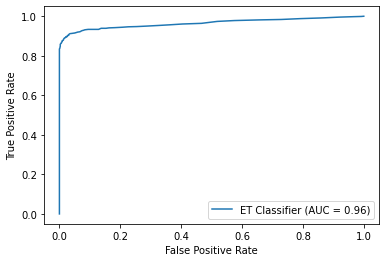

In [87]:
plot_roc_curve(ET,X_test, y_test,  name= 'ET Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [88]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, gb.predict(X_test))

In [89]:
print (auc(false_positive_rate, true_positive_rate))

0.9390795206971678


In [90]:
print(roc_auc_score(y_test, y_pred))

0.7037854030501088
